In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#|default_exp draw.pil_drawer

# PIL Drawer

> API details.

In [ ]:
#|export
from fastcore.all import *
import polvo as pv
import polvo.bbox as pb

/home/lgvaz/git/polvo/polvo/utils/logging.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
#|export
class PILDrawer:
    # separating the drawing functions from its call allows us to pass custom arguments to each item
    def collect_draw_fns(self, record):
        return [item.draw(self) for item in record]
    
    def draw_fns(self, fns, image=None):
        for fn in fns: image = fn(image=image)
        return image
        
    def draw(self, record, image=None):
        fns = self.collect_draw_fns(record)
        return self.draw_fns(fns, image=image)

    def open_image(self, image_file): return lambda image, **kwargs: image_file.open(**kwargs) # swallow image argument
    def overlay_bbox(self, bbox): return partial(pb.overlay, bbox=bbox)

In [ ]:
records = [pv.ImageFile(str(pv.test.SEG_IMAGE)),
           pb.BBox.from_xyxy(20, 20, 64, 280),
           pb.BBox.from_xywh(10, 72, 478, 72),
           pb.BBox.from_relative_xcycwh(.4, .4, .7, .6, 512, 300),
           pb.OBBox.from_clockwise(256,175, 100,140, 80)]

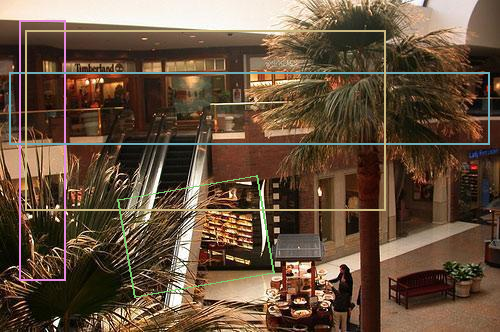

In [ ]:
drawer = PILDrawer()
drawer.draw(records)

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()